In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [3]:
# create dataframe to hold data from api request
cities = pd.DataFrame(cities)
cities.columns = ['City']
cities.head()

,City
0,vaini
1,atuona
2,dikson
3,mataura
4,bredasdorp


In [4]:
cities.tail()

,City
584,lolua
585,inuvik
586,umm lajj
587,porto novo
588,charters towers


In [5]:
# set up lists to hold reponse info
temp = []
cloud = []
humidity = []
wind_speed = []
country = []
max_temp = []
city_lat = []
city_long = []

number = 1

city_listed = []


# graphics for data retrieval log
print("Data Retrieval Process")
print("--------------------------------------")


# Loop through the list of cities and perform a request for data on each
for index, row in cities.iterrows():    
    #print(row[0])
    
    try:
        
        # Save config information.
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + api_key + "&q=" + (row[0]) + "&mode=json&units=imperial"
        query_url
    
        #print(query_url)
    
        # requests for open weather api's
        weather_response = requests.get(query_url)
        weather_data_json = weather_response.json()
    
        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
    
        # append all required data from json during each loop
        temp.append(weather_data_json['main']['temp'])
        cloud.append(weather_data_json['clouds']['all'])
        humidity.append(weather_data_json['main']['humidity'])
        wind_speed.append(weather_data_json['wind']['speed'])
        country.append(weather_data_json['sys']['country'])
        city_lat.append(weather_data_json['coord']['lat'])
        city_long.append(weather_data_json['coord']['lon'])
        max_temp.append(weather_data_json['main']['temp_max'])
        
        # append list to create df with
        city_listed.append(row[0])
       
        # continue graphics and log each retrieval request
        print("Processing Record:  " + str(number) +"  " + (row[0]))
        
        # add to number for log
        number = number + 1
        
    except KeyError:
        # print exception in data log for not finding city
        print("city not found... skipping")
        continue
        

# finish graphics for data log
print("-------------------------------------")
print("Data Set Retrieval Complete")
print("-------------------------------------")

Data Retrieval Process
--------------------------------------
Processing Record:  1  vaini
Processing Record:  2  atuona
Processing Record:  3  dikson
Processing Record:  4  mataura
Processing Record:  5  bredasdorp
Processing Record:  6  kapaa
city not found... skipping
Processing Record:  7  anadyr
Processing Record:  8  palmi
Processing Record:  9  whitefish
Processing Record:  10  hilo
Processing Record:  11  brae
Processing Record:  12  coos bay
Processing Record:  13  innisfail
Processing Record:  14  simao
Processing Record:  15  wejherowo
Processing Record:  16  adrar
Processing Record:  17  boende
Processing Record:  18  severo-kurilsk
Processing Record:  19  norman wells
Processing Record:  20  ushuaia
Processing Record:  21  te anau
city not found... skipping
Processing Record:  22  albany
Processing Record:  23  punta arenas
Processing Record:  24  taseyevo
Processing Record:  25  rancho palos verdes
Processing Record:  26  kabinda
Processing Record:  27  makakilo city
Proc

Processing Record:  223  napa
Processing Record:  224  laguna
Processing Record:  225  blagoyevo
Processing Record:  226  dayong
Processing Record:  227  santa helena
Processing Record:  228  samarai
Processing Record:  229  airai
Processing Record:  230  salcininkai
Processing Record:  231  beringovskiy
city not found... skipping
Processing Record:  232  quatre cocos
Processing Record:  233  bathsheba
city not found... skipping
Processing Record:  234  huarmey
Processing Record:  235  general roca
Processing Record:  236  chara
Processing Record:  237  kavaratti
Processing Record:  238  khatanga
Processing Record:  239  pisco
Processing Record:  240  hobyo
Processing Record:  241  port hardy
Processing Record:  242  avera
Processing Record:  243  tuktoyaktuk
Processing Record:  244  lere
Processing Record:  245  gazanjyk
Processing Record:  246  padang
Processing Record:  247  pangnirtung
Processing Record:  248  bara
Processing Record:  249  baykit
Processing Record:  250  skibbereen

city not found... skipping
Processing Record:  444  coquimbo
city not found... skipping
Processing Record:  445  daru
Processing Record:  446  hidalgo
Processing Record:  447  senador jose porfirio
Processing Record:  448  iqaluit
Processing Record:  449  la asuncion
Processing Record:  450  truro
Processing Record:  451  jumla
Processing Record:  452  thinadhoo
Processing Record:  453  les escoumins
Processing Record:  454  dzerzhinsk
Processing Record:  455  sudzha
Processing Record:  456  tiznit
Processing Record:  457  sorong
Processing Record:  458  marsa matruh
Processing Record:  459  pogradec
Processing Record:  460  tsabong
Processing Record:  461  kut chap
city not found... skipping
Processing Record:  462  ipueiras
Processing Record:  463  khrebtovaya
Processing Record:  464  mezen
Processing Record:  465  rodrigues alves
Processing Record:  466  bermeo
city not found... skipping
Processing Record:  467  nuuk
Processing Record:  468  governador dix-sept rosado
Processing Rec

In [6]:
# pretty print json
pprint(weather_data_json)

{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.07, 'lon': 146.27},
 'dt': 1570937947,
 'id': 2171722,
 'main': {'grnd_level': 981.88,
          'humidity': 16,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 91.47,
          'temp_max': 91.47,
          'temp_min': 91.47},
 'name': 'Charters Towers',
 'sys': {'country': 'AU', 'sunrise': 1570909594, 'sunset': 1570954548},
 'timezone': 36000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 82, 'speed': 6.94}}


In [7]:
len(city_listed), len(country), len(city_lat), len(city_long), len(temp), len(max_temp), len(humidity), len(cloud), len(wind_speed)

(525, 525, 525, 525, 525, 525, 525, 525, 525)

In [8]:
cities_mod2 = pd.DataFrame({"City" : city_listed,
                           "Country" : country,
                           "Lat" : city_lat,
                            "Long" : city_long,
                            "Temp" : temp,
                            "Max Temp" : max_temp,
                            "Humidity" : humidity,
                           "Clouds" : cloud,
                           "Wind Speed" : wind_speed})
cities_mod2

,City,Country,Lat,Long,Temp,Max Temp,Humidity,Clouds,Wind Speed
0,vaini,IN,15.34,74.49,74.34,77.00,94,75,2.24
1,atuona,PF,-9.80,-139.03,79.05,79.05,70,12,15.72
2,dikson,RU,73.51,80.55,30.63,30.63,98,100,17.55
3,mataura,NZ,-46.19,168.86,55.00,55.00,73,100,11.01
4,bredasdorp,ZA,-34.53,20.04,58.93,60.01,87,86,8.05
...,...,...,...,...,...,...,...,...,...
520,batagay-alyta,RU,67.80,130.41,15.33,15.33,70,0,2.34
521,inuvik,CA,68.36,-133.71,30.20,30.20,68,90,3.36
522,umm lajj,SA,25.02,37.27,75.63,75.63,64,41,3.15
523,porto novo,BR,-23.68,-45.44,69.80,69.80,68,0,2.24


In [9]:
# find and assign variable for current date to use in graph titles
todaysdate = time.strftime("%m/%d/%Y")
todaysdate

'10/12/2019'

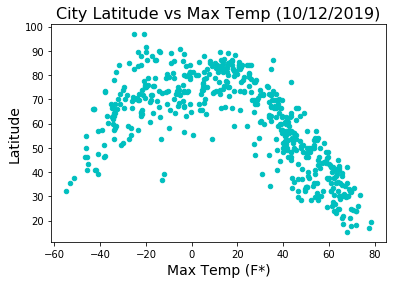

<Figure size 432x288 with 0 Axes>

In [10]:
# create graph, titles, date and save lat vs max temp

lat_vs_max_temp = cities_mod2.plot.scatter(x='Lat',
                                     y='Max Temp',
                                     c='c')


# add titles and legend
plt.title('City Latitude vs Max Temp ('+ todaysdate +')', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Max Temp (F*)', fontsize=14)

# show
plt.show()

# save figure as png
plt.savefig("Images/lat_vs_max_temp.png")



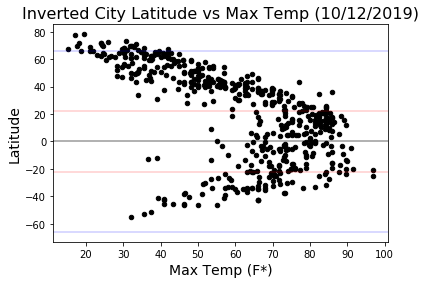

<Figure size 432x288 with 0 Axes>

In [11]:
# create graph, titles, date and save lat vs max temp
colors = []

lat_vs_max_temp = cities_mod2.plot.scatter(x='Max Temp',
                                     y='Lat',
                                     c='k')

#color = 'r' if (group['label'] < 0).all() else 'g'

# add lines representing equator, tropics, arctic and antarctic circles
plt.axhline(y=-66, color='b', linestyle='-', alpha=0.2)
plt.axhline(y=-22, color='r', linestyle='-', alpha=0.2)
equator = plt.axhline(y=0, color='k', linestyle='-', alpha=0.4)
plt.axhline(y=22, color='r', linestyle='-', alpha=0.2)
plt.axhline(y=66, color='b', linestyle='-', alpha=0.2)                                     

# add titles and legend
plt.title('Inverted City Latitude vs Max Temp ('+ todaysdate +')', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Max Temp (F*)', fontsize=14)

# show
plt.show()

# save figure as png
plt.savefig("Images/lat_vs_max_temp_inv_w_equator.png")



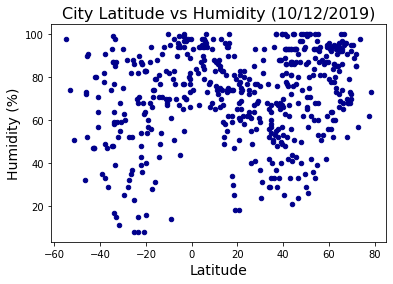

In [12]:
# create graph, titles, date and save lat vs humidity
lat_vs_humidity = cities_mod2.plot.scatter(x='Lat',
                                     y='Humidity',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Humidity ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.savefig("Images/lat_vs_humidity.png")

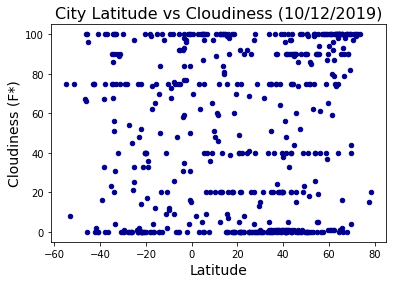

In [17]:
# create graph, titles, date and save lat vs cloudiness
lat_vs_cloudiness = cities_mod2.plot.scatter(x='Lat',
                                     y='Clouds',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Cloudiness ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (F*)', fontsize=14)
plt.savefig("Images/lat_vs_cloudiness.png")

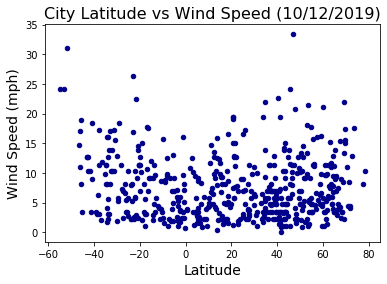

In [18]:
# create graph, titles, date and save lat vs wind speed
lat_vs_wind_speed = cities_mod2.plot.scatter(x='Lat',
                                     y='Wind Speed',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Wind Speed ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.savefig("Images/lat_vs_wind_speed.png")